<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Volume Variance Relations for Scaling Statistics

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Volume Variance Relations**. It is critical to remember:

* all spatial statistics have an implicit scale assumption

For example, as the scale, support size, increases the variance reduces.

**YouTube Lecture**: check out my lecture on:
        
* [Scale](https://youtu.be/suWCmal03Rg?si=XEtIlBlgP175qkUb)
* [Dispersion Variance](https://youtu.be/UI81msM0wXQ?si=Ige9n70STMfC6kwU)
* [Scaling Statistics](https://youtu.be/MM7Tn8TU5Bk?si=0GVOKJ6nYx1cib28)
    
For your convenience here's a summary of salient points. Let's start with dispersion variance.

#### Dispersion Variance

A generalized form of variance that accounts for the volume support of the samples, $\cdot$, or model, $v$, and the area of interest, $V$ represented for data support size as,

$$
D^2(\cdot, V) 
$$

and for model support size as,

$$
D^2(v, V) 
$$

for the case of data support size over the volume of interest (including all the spatial data samples) this simplifies to the variance,

$$
\sigma^2 = D^2(\cdot,V)
$$

therefore, the well-known variance is a special case of dispersion variance. Dispersion variance under the assumption of stationary mean, variance and variogram can be calculated through this equation,

$$
D^2(v,V) = \overline{\gamma}_{V,V} - \overline{\gamma}_{v,v} 
$$

where $\overline{\gamma}_{V,V}$ and $\overline{\gamma}_{v,v}$ are variogram models integrated over volume $V$ and $v$ respectively. 

#### Volume Variance Relations

**Volume-variance Relations** - as the volume support increases the variance reduces

Predicting this behavior is central to handling multiple scales of data and estimation.

Scale Observations:

* The mean does not change.

* The variance changes, known as volume-variance relations.

* There may be shape change (we will not tackle that here). Best practice is to check shape change empirically. It is common to assume no shape change (affine distribution correction) or to use a simple shape change model (indirect lognormal correction)

* The variance reduction in the distribution is inversely proportional to the range of spatial continuity.  

* Over common changes in scale this impact may be significant. 

* We need a model to predict this change.

Scale Change Models:

**Empirical** - build a small scale, high resolution model and scale it up. This requires a model for spatial feature scale up. For example, averaging the small scale cells within the larger scale cell assumes linear averaging. There is a more flexible model known as power law averaging.

$$
z_V = \left[ \frac{1}{n} \sum z_v^{\omega} \right] ^{\frac{1}{\omega}}
$$

where $\omega$ is the power of averaging. For example:

* $\omega = 1$ is a regular linear averaging
* $\omega = -1$ is a harmonic averaging 
* $\omega = 0$ is a geometric averaging (this is proved in the limit as $\omega \rightarrow 0$)

**Model** - directly adjust the statistics for change in scale. For example, under the assumption of linear averaging and a stationary variogram and variance:

$$
f = 1 - \frac{\overline{\gamma}(v,v)}{\sigma^2}
$$

where $f$ is variance reduction factor,

$$
f = \frac{D^2(v,V)}{D^2(\cdot,V)} = \frac{D^2(v,V)}{\sigma^2}
$$

in other words, $f$ is the ratio of the variance at scale $v$ to the variance at the original data point support scale.

Here I provide simple empirical, numerical demonstrations of the impact of change on scale on variance and the impact of spatial continuity on this effect. 

#### Load the Required Libraries

The following code loads the required libraries.

In [3]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))

GeostatsPy version: 0.0.71


We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib import gridspec                               # custom subplots
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
from IPython.utils import io                                  # mute output from simulation
cmap = plt.cm.inferno                                         # color map for plotting 

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

We use GeostatsPy, but we need a new upscale (linear averaging) method and a plotting method that does not interpolate. I will add these to GeostatsPy shortly.

In [7]:
def getindex(nc,cmn,csiz,loc):                                # take location and grid and find the cell
    ic = min(int((loc - cmn) / csiz), nc - 1)
    return ic

def upscale(model,new_nx,new_ny):                             # scale up model with linear averaging
    ny, nx = model.shape
    new_xsiz = nx/new_nx; new_xmn = new_xsiz * 0.5
    new_ysiz = ny/new_ny; new_ymn = new_ysiz * 0.5
    new_model = np.zeros((new_ny,new_nx)); count = np.zeros((new_ny,new_nx))
    for iy in range(0,ny):
        yloc = iy+0.5
        new_iy = getindex(new_ny,new_ymn,new_ysiz,yloc)
        for ix in range(0,nx):
            xloc = ix+0.5
            new_ix = getindex(new_nx,new_xmn,new_xsiz,xloc)
            new_model[new_iy,new_ix] = new_model[new_iy,new_ix] + model[iy,ix] 
            count[new_iy,new_ix] = count[new_iy,new_ix] + 1 
    for iny in range(0,new_ny):
        for inx in range(0,new_nx):
            if count[iny,inx] > 0:
                new_model[iny,inx] = new_model[iny,inx] / count[iny,inx]
    return new_model

def cellplt_st(array,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    im = plt.imshow(array,cmap,vmin=vmin,vmax=vmax,extent=[xmin, xmax, ymin, ymax])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.clim(vmin,vmax)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20) 


#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [9]:
#os.chdir("C:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE"). 

#### Spatial Data

Make dummy data with a reference distribution, but outside the area of interest for unconditional realizations.

In [11]:
nd = 100                                                      # number of data
df = pd.DataFrame(data = np.random.normal(loc=0.1,scale = 0.03,size=nd),columns=['Porosity'])
df['X'] = np.full(nd,-99999); df['Y'] = np.full(nd,-99999)
df.head()

,Porosity,X,Y
0,0.162471,-99999,-99999
1,0.071613,-99999,-99999
2,0.125199,-99999,-99999
3,0.066526,-99999,-99999
4,0.142866,-99999,-99999


##### Set the Spatial Parameters

The following are the basic parameters for the experiment.  This includes the number of cells in the 2D regular grid, the cell size (step) and the x and y min and max along with the color scheme.

In [13]:
nx = 100; ny = 100; xsiz = 100; ysiz = 100                    # grid number of cells and cell size
xmin = 0.0; ymin = 0.0;                                       # grid origin
xmax = xmin + nx * ysiz; ymax = ymin + ny * xsiz              # calculate the extent of model
xmn = xmin + 0.5 * xsiz; ymn = ymin + 0.5 * ysiz              # grid origin, lower left corner

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars
permmin = 0.0; permmax = 70
vmin = 0.0; vmax = 0.2                                        # property min and max
tmin = -999; tmax = 999                                       # trimming limits
ndmin = 0; ndmax = 10                                         # set minimum and maximum number of data

#### Numerical Scale Up with Two Models

Let's build two models and scale them up to demonstrate the concept of volume variance.

* one model has show range spatial continuity
* one model has longer range spatial continuity with significant anisotropy

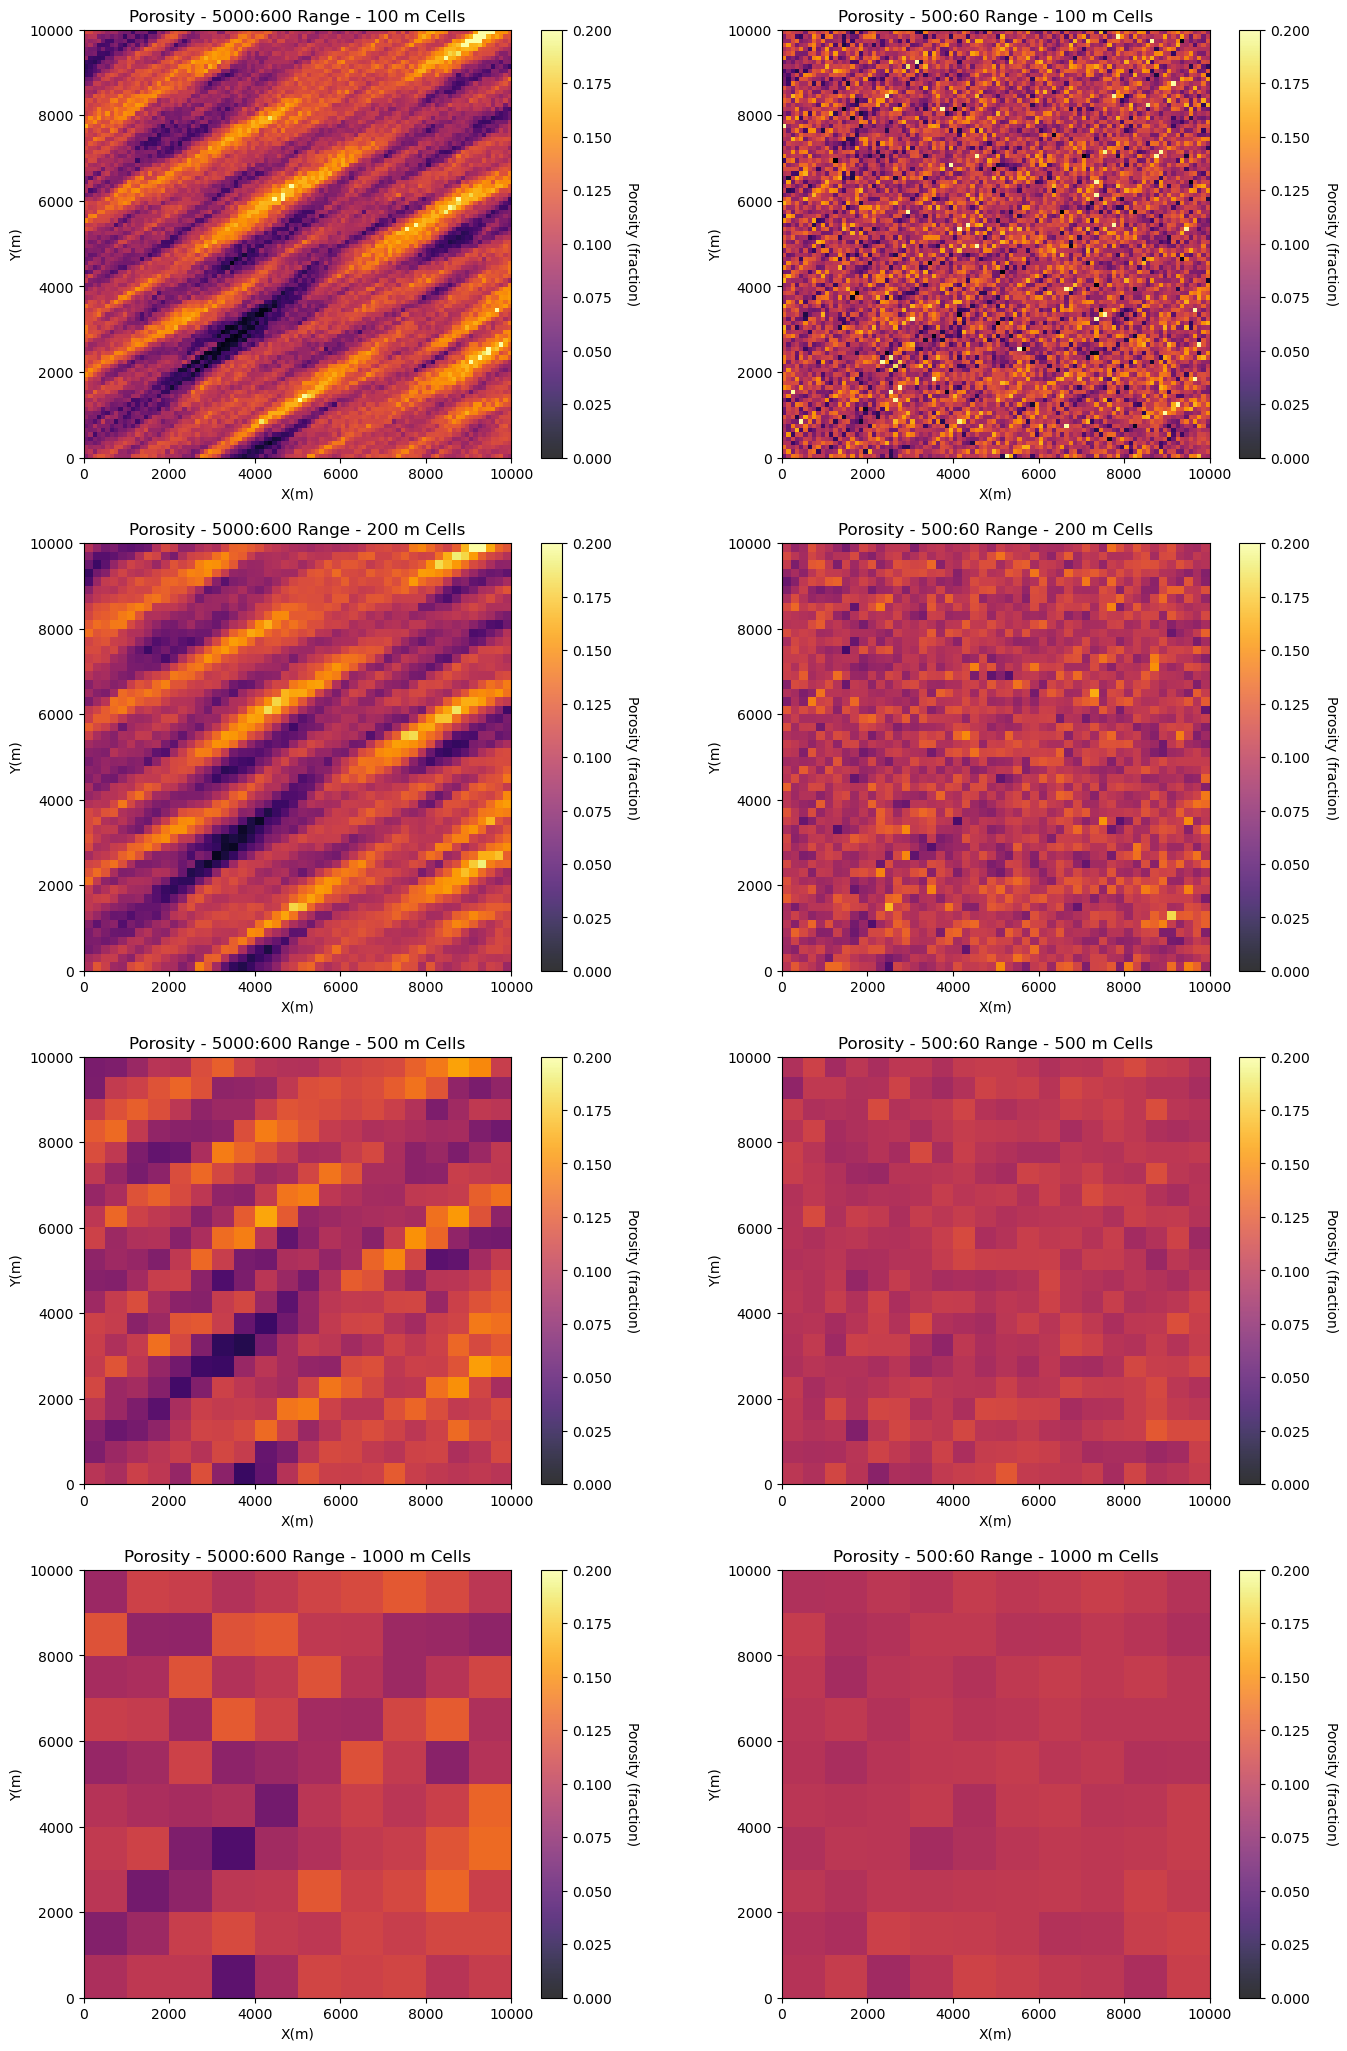

In [15]:
%%capture --no-display  

range_maj1 = 5000; range_min1 = 600                           # set spatial continuity ranges for both models
range_maj2 = 500; range_min2 = 60

vario1 = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=60.0,hmaj1=range_maj1,hmin1=range_min1)

sim1 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,ktype=0,colocorr=0.0,sec_map=0,vario=vario1)[0]

sim1 = GSLIB.affine(sim1,.1,0.03)                             # correct the distribution to a target mean and standard deviation.

vario2 = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=60.0,hmaj1=range_maj2,hmin1=range_min2)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,ktype=0,colocorr=0.0,sec_map=0,vario=vario2)[0]

sim2 = GSLIB.affine(sim2,.1,0.03)                             # correct the distribution to a target mean and standard deviation.

plt.subplot(421)
GSLIB.pixelplt_st(sim1,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(422)
GSLIB.pixelplt_st(sim2,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

mid = upscale(sim1,new_nx = 50,new_ny = 50)
mid2 = upscale(sim2,new_nx = 50,new_ny = 50)

plt.subplot(423)
GSLIB.pixelplt_st(mid,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(424)
GSLIB.pixelplt_st(mid2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

midb = upscale(sim1,new_nx = 20,new_ny = 20)
midb2 = upscale(sim2,new_nx = 20,new_ny = 20)

plt.subplot(425)
GSLIB.pixelplt_st(midb,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(426)
GSLIB.pixelplt_st(midb2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

course = upscale(sim1,new_nx = 10,new_ny = 10)
course2 = upscale(sim2,new_nx = 10,new_ny = 10)

plt.subplot(427)
GSLIB.pixelplt_st(course,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(428)
GSLIB.pixelplt_st(course2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.1, wspace=0.2, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=300,bbox_inches="tight")
plt.show()

#### Impact of Scaling on the Distribution

Observe the impact of scaling on the two models. First one with long spatial continuity and then one with short spatial continuity.

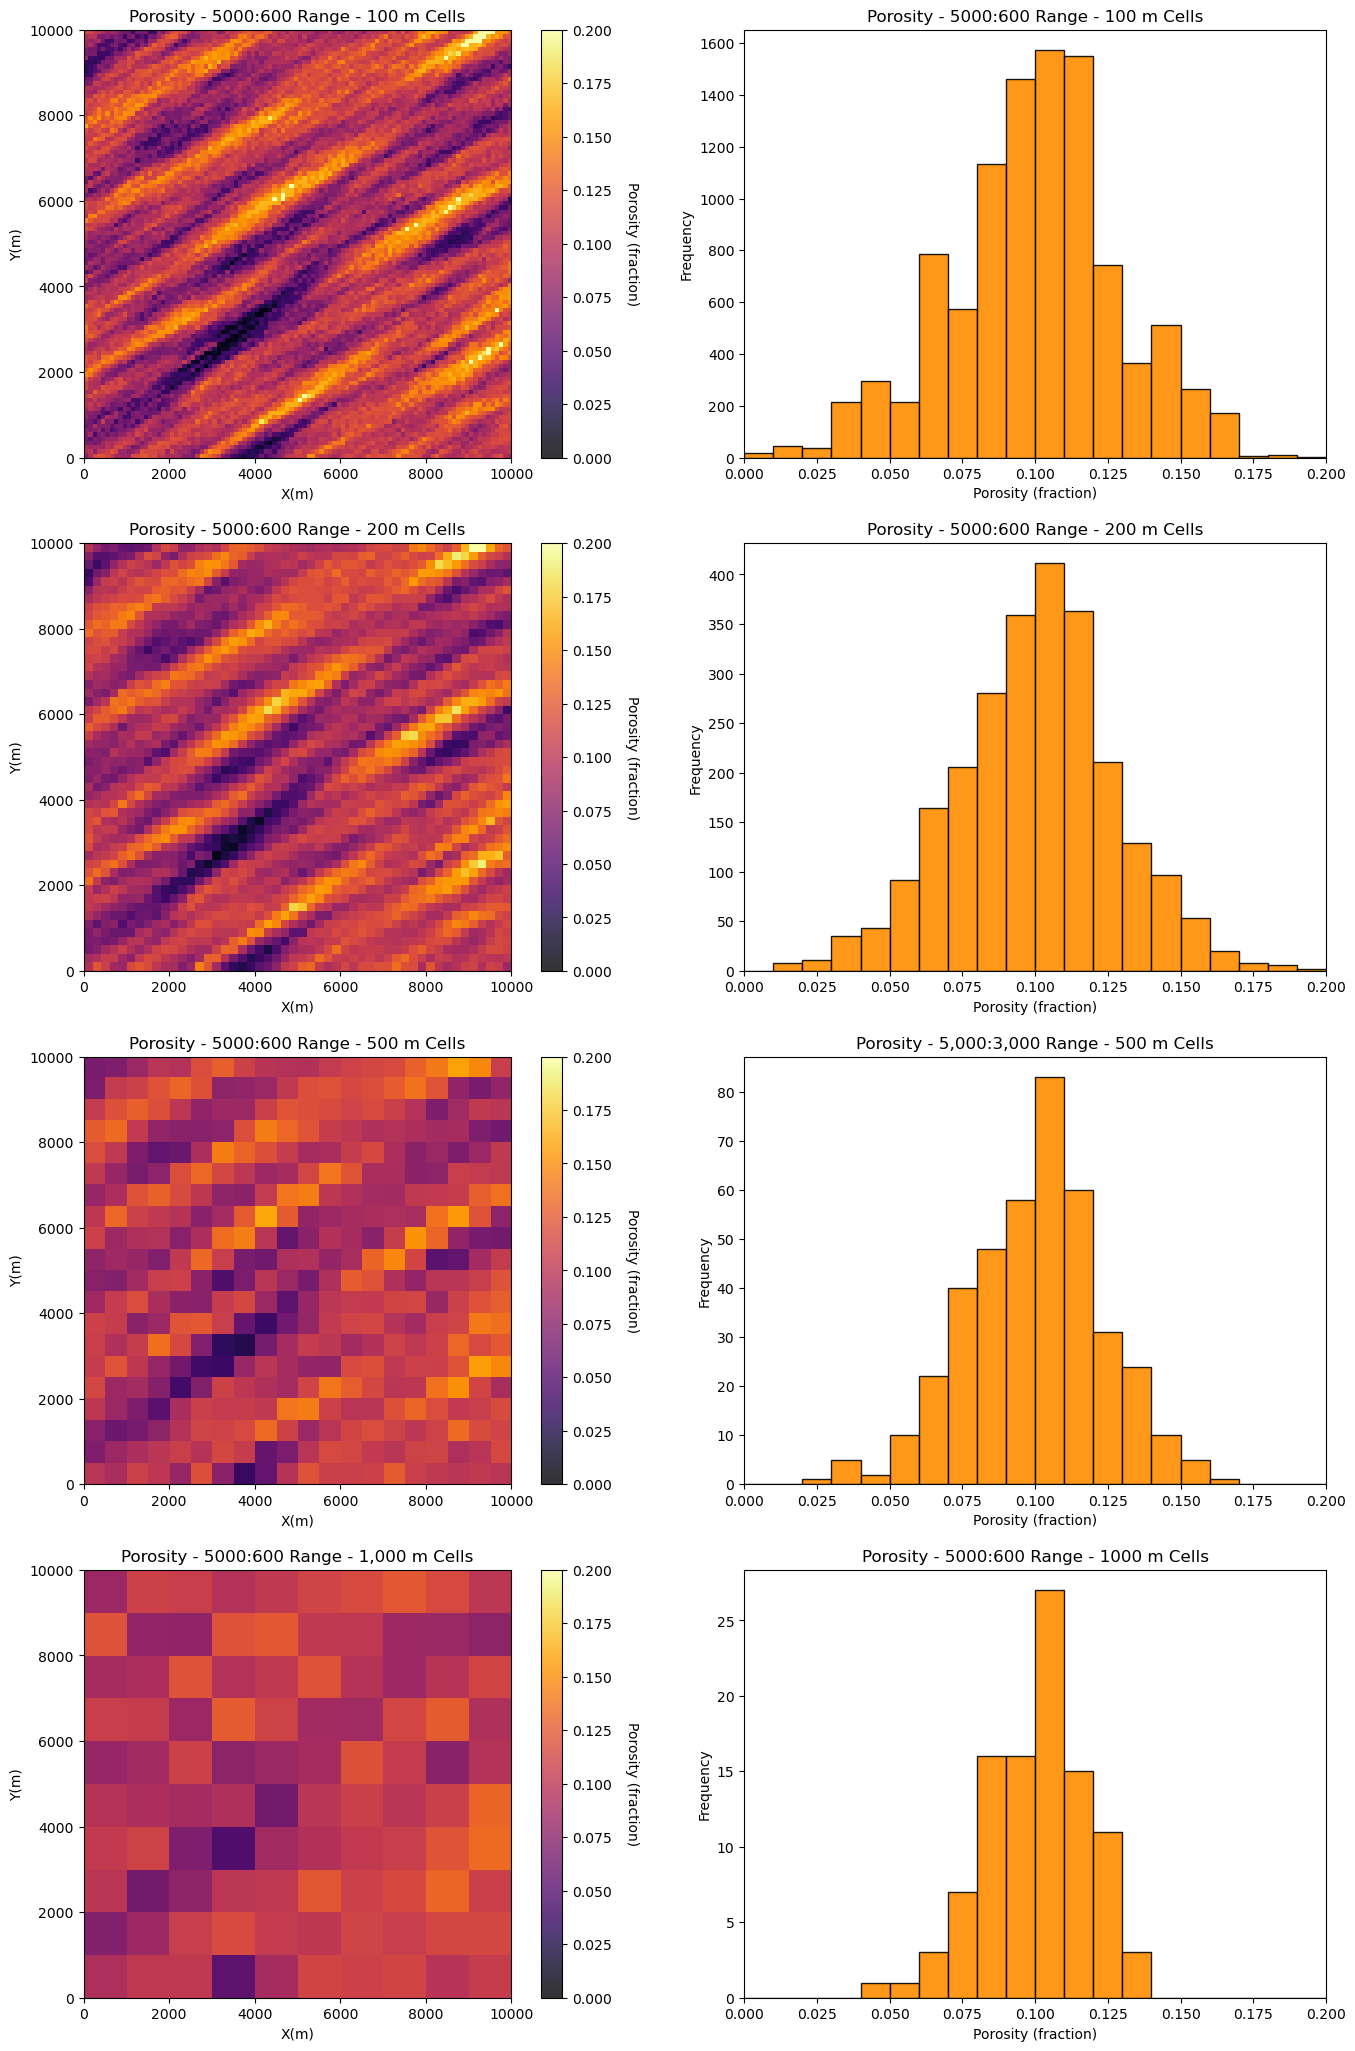

In [17]:
plt.subplot(421)
GSLIB.pixelplt_st(sim1,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(422)
GSLIB.hist_st(sim1.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 100 m Cells')

mid = upscale(sim1,new_nx = 50,new_ny = 50)

plt.subplot(423)
GSLIB.pixelplt_st(mid,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(424)
GSLIB.hist_st(mid.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 200 m Cells')

midb = upscale(sim1,new_nx = 20,new_ny = 20)

plt.subplot(425)
GSLIB.pixelplt_st(midb,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(426)
GSLIB.hist_st(midb.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - 5,000:3,000 Range - 500 m Cells')

course = upscale(sim1,new_nx = 10,new_ny = 10)

plt.subplot(427)
GSLIB.pixelplt_st(course,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 1,000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(428)
GSLIB.hist_st(course.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 1000 m Cells')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.1, wspace=0.2, hspace=0.2)
#plt.savefig('sim1_scale_change.tif',dpi=300,bbox_inches="tight")
plt.show()

and now the model with shorter range, isotropic spatial continuity.

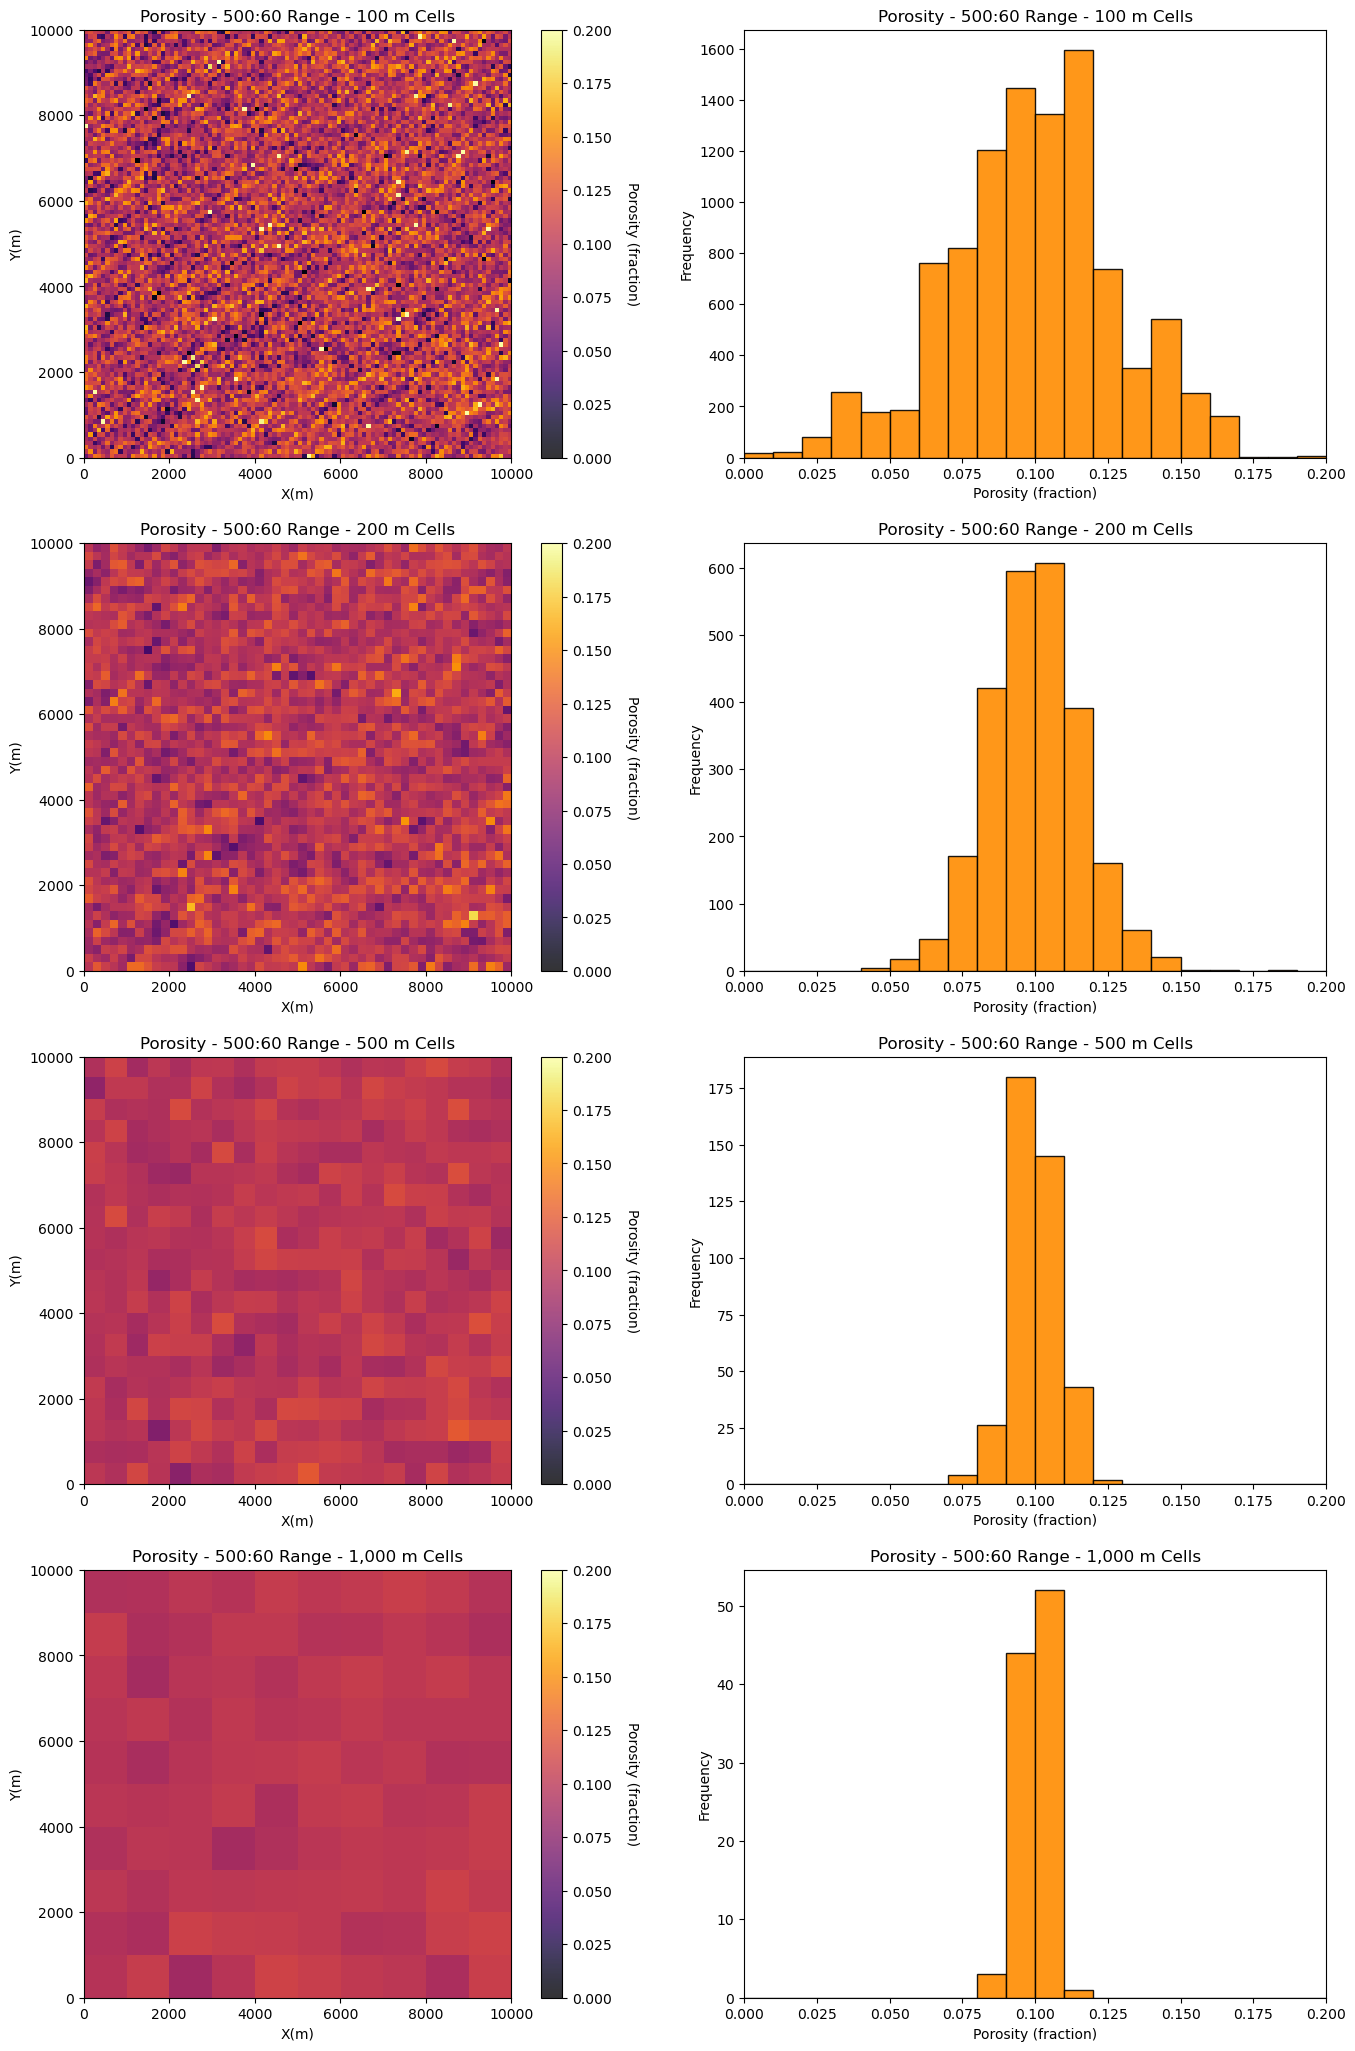

In [19]:
plt.subplot(421)
GSLIB.pixelplt_st(sim2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(422)
GSLIB.hist_st(sim2.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 100 m Cells')

mid2 = upscale(sim2,new_nx = 50,new_ny = 50)

plt.subplot(423)
GSLIB.pixelplt_st(mid2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(424)
GSLIB.hist_st(mid2.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 200 m Cells')

midb2 = upscale(sim2,new_nx = 20,new_ny = 20)

plt.subplot(425)
GSLIB.pixelplt_st(midb2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(426)
GSLIB.hist_st(midb2.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 500 m Cells')

course2 = upscale(sim2,new_nx = 10,new_ny = 10)

plt.subplot(427)
GSLIB.pixelplt_st(course2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 1,000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(428)
GSLIB.hist_st(course2.flatten(),0,.2,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity (fraction)",title='Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 1,000 m Cells')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.1, wspace=0.2, hspace=0.2)
#plt.savefig('sim2_scale_change.tif',dpi=300,bbox_inches="tight")
plt.show()

#### Relationship Between Scale and Dispersion

Let's loop over multiple upscaled grid cell sizes and calculate the resulting variance and standard deviation and then plot it to observe the relationship between volume support and variance, i.e., the volume-variance relationship.

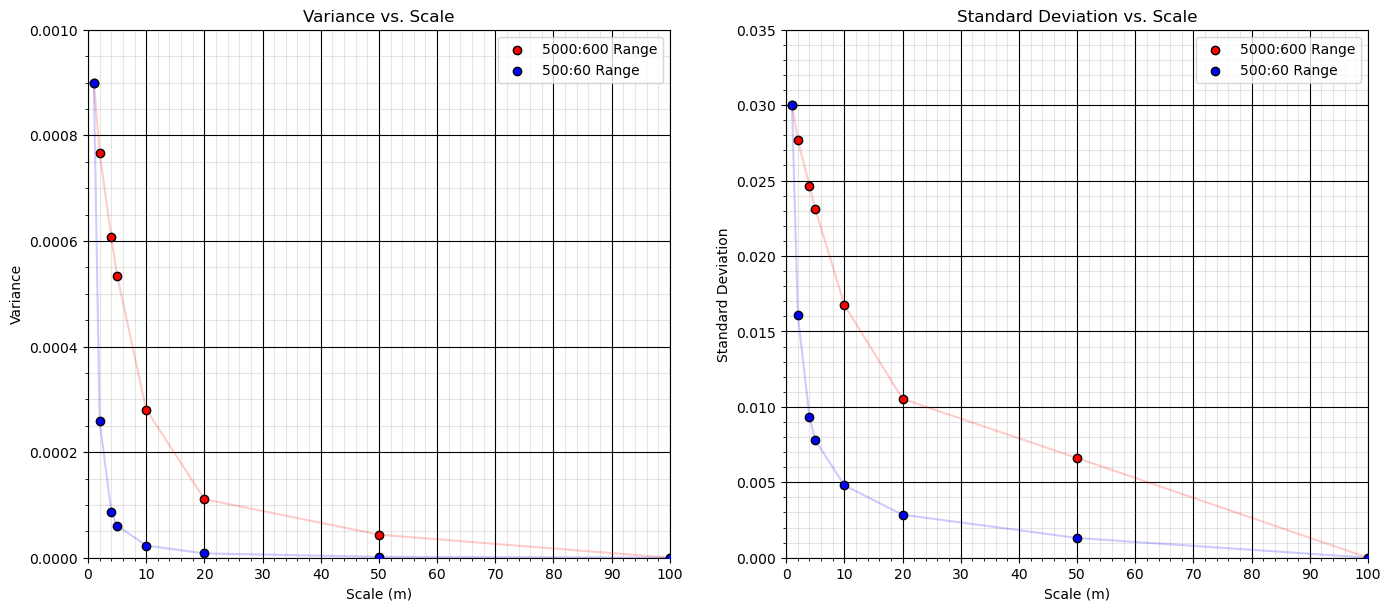

In [21]:
scale = []; var1 = []; var2 = []; std1 = []; std2 = []; ns = [50,25,20,10,5,2,1]
scale.append(1.0); var1.append(np.var(sim1)); var2.append(np.var(sim2)); std1.append(np.std(sim1)); std2.append(np.std(sim2))
for i,nc in enumerate(ns):                                    # loop over cases and perform upscaling              
    scale.append(100/nc)
    scale1 = upscale(sim1,new_nx = nc,new_ny = nc)
    scale2 = upscale(sim2,new_nx = nc,new_ny = nc)
    var1.append(np.var(scale1)); var2.append(np.var(scale2))
    std1.append(np.std(scale1)); std2.append(np.std(scale2))

plt.subplot(121)
plt.plot(scale,var1,color='red',zorder=1,alpha=0.2)
plt.scatter(scale,var1,color='red',edgecolor='black',zorder=100,label=str(range_maj1) + ':' + str(range_min1) + ' Range')
plt.plot(scale,var2,color='blue',zorder=1,alpha=0.2)
plt.scatter(scale,var2,color='blue',edgecolor='black',zorder=100,label=str(range_maj2) + ':' + str(range_min2) + ' Range')
plt.xlim([0,100]); plt.ylim([0,0.001]); plt.xlabel('Scale (m)'); plt.ylabel('Variance')
plt.grid(which='major',axis='both',color='black'); plt.grid(which='minor',axis='both',color='grey',alpha=0.2)
plt.legend(loc = 'upper right'); plt.title('Variance vs. Scale')
plt.gca().xaxis.set_major_locator(MultipleLocator(10));plt.gca().xaxis.set_minor_locator(MultipleLocator(2));  # set the major ticks aligned with the bins
plt.gca().yaxis.set_major_locator(MultipleLocator(0.0002)); plt.gca().yaxis.set_minor_locator(MultipleLocator(0.00005)) 

plt.subplot(122)
plt.plot(scale,std1,color='red',zorder=1,alpha=0.2)
plt.scatter(scale,std1,color='red',edgecolor='black',zorder=100,label=str(range_maj1) + ':' + str(range_min1) + ' Range')
plt.plot(scale,std2,color='blue',zorder=1,alpha=0.2)
plt.scatter(scale,std2,color='blue',edgecolor='black',zorder=100,label=str(range_maj2) + ':' + str(range_min2) + ' Range')
plt.xlim([0,100]); plt.ylim([0,0.035]); plt.xlabel('Scale (m)'); plt.ylabel('Standard Deviation')
plt.grid(which='major',axis='both',color='black'); plt.grid(which='minor',axis='both',color='grey',alpha=0.2)
plt.legend(loc = 'upper right'); plt.title('Standard Deviation vs. Scale')

plt.gca().xaxis.set_major_locator(MultipleLocator(10));plt.gca().xaxis.set_minor_locator(MultipleLocator(2));  # set the major ticks aligned with the bins
plt.gca().yaxis.set_major_locator(MultipleLocator(0.005)); plt.gca().yaxis.set_minor_locator(MultipleLocator(0.001)) 

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
#plt.savefig('plot_scale_change.tif',dpi=300,bbox_inches="tight")
plt.show()

#### Comments

This was a basic demonstration empirical scaling to demonstrate volume variance relations. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)